## S10 - Residual Connections in CNNs and One Cycle Policy

#### Target:
    Accuracy - 90%
    No of Epochs - 24
    Max learning rate to be achieved at Epoch 5
    Use OneCycleLR scheduler
    Compute maximum learning rate using pytorch LR finder
    Use image augmentation ( RandomCrop, FlipLR, Cutout)

#### Result:
    No of parameters of model: 6.57 million
    Test Accuracy: 91.87%
    Trained for 24 epochs and with maximum learning rate 0.0008 (found at steepest gradient)

#### Analysis:

    Model is heavy as we are using kernels of ( 64, 128, 256 ) count.
    Model is prone to overfitting.
    When maximum learning rate is taken at lowest loss then test accuracy seems to be better ( 92.56%) than the maximum learning rate taken at steepest gradient.
    Usage of OneCycleLR helped to achieve target accuracy faster.



### Install Libraries

In [2]:
!pip install albumentations

In [18]:
pwd

'/content'

In [19]:
mkdir appn

In [20]:
cd /content/appn

/content/appn


In [21]:
!git clone -b main https://github.com/das91t70/TSAIV2Main/

Cloning into 'TSAIV2Main'...
remote: Enumerating objects: 73, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 73 (delta 24), reused 3 (delta 0), pack-reused 0
Receiving objects: 100% (73/73), 20.61 KiB | 2.94 MiB/s, done.
Resolving deltas: 100% (24/24), done.


## Data Transformations using albumentation

We first start with defining our data transformations. We need to think what our data is and how can we augment it to correct represent images which it might not see otherwise.

In [22]:
from appn.TSAIV2Main.S10.load_and_visualize_data import CIFAR10DataOps

In [23]:
train = CIFAR10DataOps(True)
test = CIFAR10DataOps(False)

100%|██████████| 170498071/170498071 [00:02<00:00, 67388764.52it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


## Load CIFAR10 dataset

## Dataloader Arguments and Train/Test Dataloaders

In [24]:
import torch
SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

# dataloader arguments - something you'll fetch these from cmdprmt
dataloader_args = dict(shuffle=True, batch_size=512, num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)

# train dataloader
train_loader = train.load_dataset(dataloader_args)

# test dataloader
test_loader = test.load_dataset(dataloader_args)

CUDA Available? True


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


## Data Statistics

* Compute mean , standard deviation, variance of training data
* Visualizing images in a batch

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


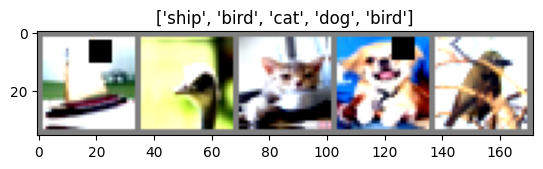

In [25]:
from appn.TSAIV2Main.S10.load_and_visualize_data import visualize_data_in_batch
visualize_data_in_batch(train_loader, 0, 4)

## Model summary

In [26]:
!pip install torchsummary
from torchsummary import summary
from appn.TSAIV2Main.S10.custom_resnet import DavidResNet
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model_nn = DavidResNet().to(device)
summary(model_nn, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]          73,728
         MaxPool2d-5          [-1, 128, 16, 16]               0
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,456
       BatchNorm2d-9          [-1, 128, 16, 16]             256
             ReLU-10          [-1, 128, 16, 16]               0
           Conv2d-11          [-1, 128, 16, 16]         147,456
      BatchNorm2d-12          [-1, 128, 16, 16]             256
             ReLU-13          [-1, 128, 16, 16]               0
           Conv2d-14          [-1,

### Save Model

In [27]:
torch.save(model_nn, '/content/appn/david_resnet')

### Install Pytorch LR Finder
For more details, check [here](https://github.com/davidtvs/pytorch-lr-finder/tree/master)

In [28]:
!pip install torch-lr-finder

### Compute maximum learning rate using FAST AI approach

As per below, we get maximum learning rate as 8.11e-04 at the steepest gradient and learning rate as 0.015 when loss is lowest

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


  0%|          | 0/100 [00:00<?, ?it/s]

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 8.11E-04


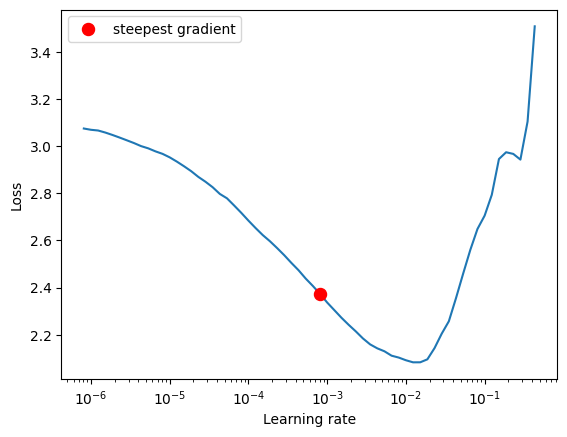

In [29]:
from appn.TSAIV2Main.S10.train_test_utils import find_max_lr_rangetest
max_lr = find_max_lr_rangetest("fastai", model_nn, train_loader=train_loader)

### Functions to train and test the data

* Specified LR Scheduler ( OnecycleLR ).
* Training data for 24 epochs
* Using Adam as optimizer
* Max learning rate achieved at the 5th epoch
* no annealing
* Target accuracy is 90%


### Trying with Learning rate as 0.0008 which is at steepest gradient

In [31]:
import torch.optim as optim
from torch.optim.lr_scheduler import OneCycleLR
from appn.TSAIV2Main.S10.train_test_utils import TrainTestUtils
EPOCHS = 24
max_lr_epochs=5
optimizer = optim.Adam(model_nn.parameters(), lr=0.01)
scheduler = OneCycleLR(optimizer, max_lr=max_lr, epochs=EPOCHS, steps_per_epoch=len(train_loader), final_div_factor=10, div_factor=10, pct_start=max_lr_epochs/EPOCHS, three_phase=False, anneal_strategy='linear')
trteutil = TrainTestUtils()
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    trteutil.train(model_nn, device, train_loader, optimizer, scheduler, epoch)
    test_loss = trteutil.test(model_nn, device, test_loader)

EPOCH: 0


  0%|          | 0/98 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
100%|██████████| 98/98 [00:20<00:00,  4.78it/s]

Last computed learning rate:  [0.00022741520838704733]
Learning Rate:  0.00022741520838704733



Test set: Average loss: 1.0659, Accuracy: 6186/10000 (61.86%)

EPOCH: 1


100%|██████████| 98/98 [00:19<00:00,  4.90it/s]

Last computed learning rate:  [0.00037371733369512587]
Learning Rate:  0.00037371733369512587



Test set: Average loss: 0.8956, Accuracy: 6928/10000 (69.28%)

EPOCH: 2


100%|██████████| 98/98 [00:19<00:00,  5.02it/s]

Last computed learning rate:  [0.0005200194590032045]
Learning Rate:  0.0005200194590032045



Test set: Average loss: 0.7120, Accuracy: 7574/10000 (75.74%)

EPOCH: 3


100%|██████████| 98/98 [00:19<00:00,  4.91it/s]

Last computed learning rate:  [0.000666321584311283]
Learning Rate:  0.000666321584311283



Test set: Average loss: 0.8307, Accuracy: 7311/10000 (73.11%)

EPOCH: 4


100%|██████████| 98/98 [00:19<00:00,  4.98it/s]

Last computed learning rate:  [0.0008106995635917917]
Learning Rate:  0.0008106995635917917



Test set: Average loss: 0.5233, Accuracy: 8220/10000 (82.20%)

EPOCH: 5


100%|██████████| 98/98 [00:19<00:00,  4.98it/s]

Last computed learning rate:  [0.0007684353781980133]
Learning Rate:  0.0007684353781980133



Test set: Average loss: 0.4592, Accuracy: 8473/10000 (84.73%)

EPOCH: 6


100%|██████████| 98/98 [00:19<00:00,  4.96it/s]

Last computed learning rate:  [0.0007261711928042349]
Learning Rate:  0.0007261711928042349



Test set: Average loss: 0.5048, Accuracy: 8290/10000 (82.90%)

EPOCH: 7


100%|██████████| 98/98 [00:20<00:00,  4.88it/s]

Last computed learning rate:  [0.0006839070074104565]
Learning Rate:  0.0006839070074104565



Test set: Average loss: 0.4237, Accuracy: 8568/10000 (85.68%)

EPOCH: 8


100%|██████████| 98/98 [00:19<00:00,  4.99it/s]


Last computed learning rate:  [0.0006416428220166779]
Learning Rate:  0.0006416428220166779

Test set: Average loss: 0.4304, Accuracy: 8620/10000 (86.20%)

EPOCH: 9


100%|██████████| 98/98 [00:19<00:00,  5.00it/s]

Last computed learning rate:  [0.0005993786366228995]
Learning Rate:  0.0005993786366228995



Test set: Average loss: 0.3440, Accuracy: 8853/10000 (88.53%)

EPOCH: 10


100%|██████████| 98/98 [00:19<00:00,  4.94it/s]

Last computed learning rate:  [0.000557114451229121]
Learning Rate:  0.000557114451229121



Test set: Average loss: 0.3979, Accuracy: 8665/10000 (86.65%)

EPOCH: 11


100%|██████████| 98/98 [00:19<00:00,  4.97it/s]

Last computed learning rate:  [0.0005148502658353425]
Learning Rate:  0.0005148502658353425



Test set: Average loss: 0.3537, Accuracy: 8884/10000 (88.84%)

EPOCH: 12


100%|██████████| 98/98 [00:19<00:00,  4.96it/s]

Last computed learning rate:  [0.00047258608044156415]
Learning Rate:  0.00047258608044156415



Test set: Average loss: 0.3541, Accuracy: 8884/10000 (88.84%)

EPOCH: 13


100%|██████████| 98/98 [00:19<00:00,  4.96it/s]

Last computed learning rate:  [0.00043032189504778567]
Learning Rate:  0.00043032189504778567



Test set: Average loss: 0.3609, Accuracy: 8850/10000 (88.50%)

EPOCH: 14


100%|██████████| 98/98 [00:20<00:00,  4.84it/s]

Last computed learning rate:  [0.00038805770965400724]
Learning Rate:  0.00038805770965400724



Test set: Average loss: 0.3132, Accuracy: 8998/10000 (89.98%)

EPOCH: 15


100%|██████████| 98/98 [00:19<00:00,  4.91it/s]

Last computed learning rate:  [0.0003457935242602288]
Learning Rate:  0.0003457935242602288



Test set: Average loss: 0.3030, Accuracy: 9067/10000 (90.67%)

EPOCH: 16


100%|██████████| 98/98 [00:19<00:00,  4.96it/s]

Last computed learning rate:  [0.0003035293388664504]
Learning Rate:  0.0003035293388664504



Test set: Average loss: 0.2960, Accuracy: 9069/10000 (90.69%)

EPOCH: 17


100%|██████████| 98/98 [00:19<00:00,  4.92it/s]

Last computed learning rate:  [0.00026126515347267185]
Learning Rate:  0.00026126515347267185



Test set: Average loss: 0.3020, Accuracy: 9048/10000 (90.48%)

EPOCH: 18


100%|██████████| 98/98 [00:20<00:00,  4.82it/s]

Last computed learning rate:  [0.00021900096807889343]
Learning Rate:  0.00021900096807889343



Test set: Average loss: 0.2966, Accuracy: 9096/10000 (90.96%)

EPOCH: 19


100%|██████████| 98/98 [00:19<00:00,  4.92it/s]

Last computed learning rate:  [0.000176736782685115]
Learning Rate:  0.000176736782685115



Test set: Average loss: 0.3107, Accuracy: 9086/10000 (90.86%)

EPOCH: 20


100%|██████████| 98/98 [00:19<00:00,  4.94it/s]

Last computed learning rate:  [0.00013447259729133657]
Learning Rate:  0.00013447259729133657



Test set: Average loss: 0.2901, Accuracy: 9159/10000 (91.59%)

EPOCH: 21


100%|██████████| 98/98 [00:19<00:00,  4.95it/s]

Last computed learning rate:  [9.220841189755804e-05]
Learning Rate:  9.220841189755804e-05



Test set: Average loss: 0.2837, Accuracy: 9167/10000 (91.67%)

EPOCH: 22


100%|██████████| 98/98 [00:20<00:00,  4.82it/s]

Last computed learning rate:  [4.994422650377961e-05]
Learning Rate:  4.994422650377961e-05



Test set: Average loss: 0.2829, Accuracy: 9187/10000 (91.87%)

EPOCH: 23


100%|██████████| 98/98 [00:19<00:00,  4.91it/s]

Last computed learning rate:  [7.680041110001289e-06]
Learning Rate:  7.680041110001289e-06



Test set: Average loss: 0.2771, Accuracy: 9180/10000 (91.80%)



### Plotted graph for training loss, testing loss, training and testing accuracy

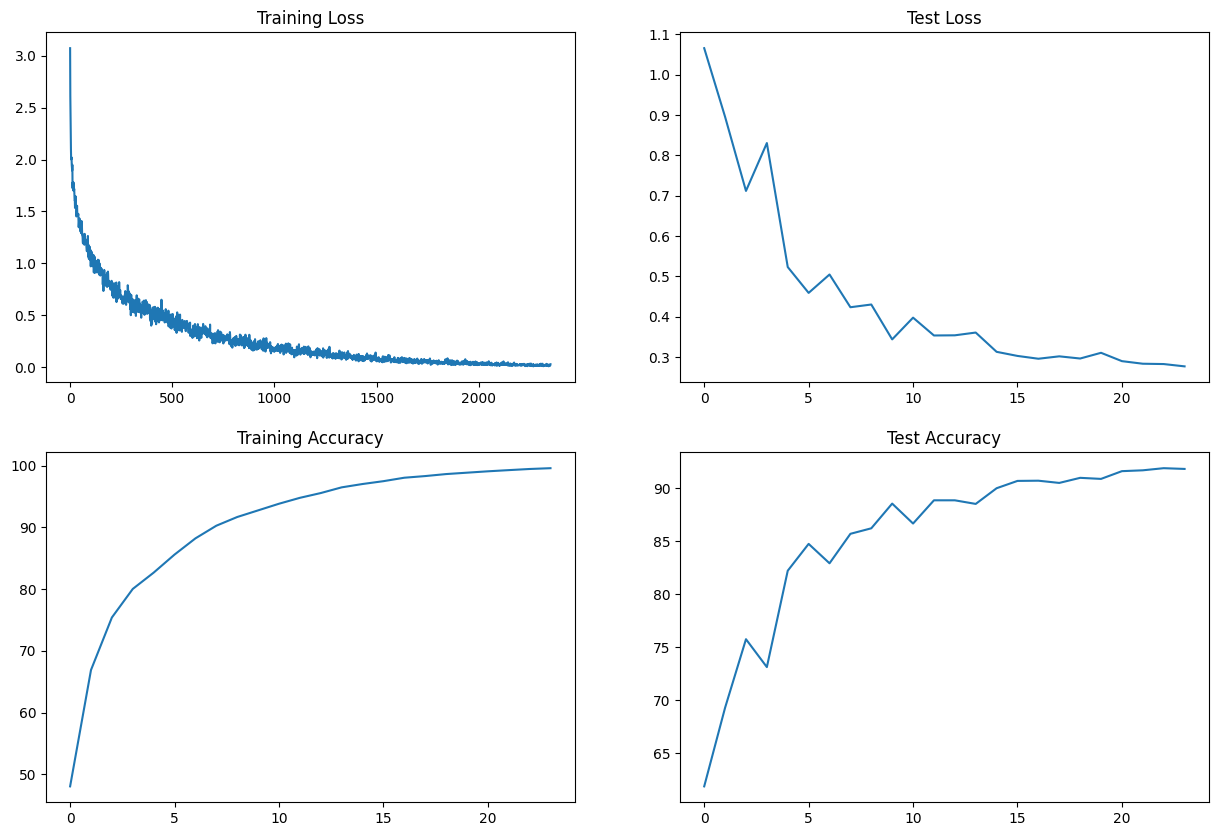

In [32]:
trteutil.plot_graphs()

### Trying with learning rate as 0.015 where loss is lowest

In [33]:
model = torch.load("/content/appn/david_resnet")
EPOCHS = 24
max_lr_epochs=5
optimizer = optim.Adam(model.parameters(), lr=0.01)
scheduler = OneCycleLR(optimizer, max_lr=0.015, epochs=EPOCHS, steps_per_epoch=len(train_loader), final_div_factor=10, div_factor=10, pct_start=max_lr_epochs/EPOCHS, three_phase=False, anneal_strategy='linear')
trteutil = TrainTestUtils()
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    trteutil.train(model, device, train_loader, optimizer, scheduler, epoch)
    test_loss = trteutil.test(model, device, test_loader)

EPOCH: 0


  0%|          | 0/98 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
100%|██████████| 98/98 [00:20<00:00,  4.89it/s]

Last computed learning rate:  [0.004205521472392637]
Learning Rate:  0.004205521472392637



Test set: Average loss: 1.2652, Accuracy: 5454/10000 (54.54%)

EPOCH: 1


100%|██████████| 98/98 [00:19<00:00,  4.92it/s]

Last computed learning rate:  [0.006911042944785275]
Learning Rate:  0.006911042944785275



Test set: Average loss: 1.2785, Accuracy: 5902/10000 (59.02%)

EPOCH: 2


100%|██████████| 98/98 [00:19<00:00,  5.03it/s]

Last computed learning rate:  [0.009616564417177913]
Learning Rate:  0.009616564417177913



Test set: Average loss: 0.8056, Accuracy: 7380/10000 (73.80%)

EPOCH: 3


100%|██████████| 98/98 [00:19<00:00,  5.00it/s]

Last computed learning rate:  [0.012322085889570551]
Learning Rate:  0.012322085889570551



Test set: Average loss: 0.8695, Accuracy: 7160/10000 (71.60%)

EPOCH: 4


100%|██████████| 98/98 [00:19<00:00,  5.00it/s]

Last computed learning rate:  [0.01499202470461869]
Learning Rate:  0.01499202470461869



Test set: Average loss: 0.5270, Accuracy: 8221/10000 (82.21%)

EPOCH: 5


100%|██████████| 98/98 [00:20<00:00,  4.83it/s]

Last computed learning rate:  [0.014210445757250268]
Learning Rate:  0.014210445757250268



Test set: Average loss: 0.6318, Accuracy: 7891/10000 (78.91%)

EPOCH: 6


100%|██████████| 98/98 [00:20<00:00,  4.90it/s]

Last computed learning rate:  [0.013428866809881847]
Learning Rate:  0.013428866809881847



Test set: Average loss: 0.4764, Accuracy: 8489/10000 (84.89%)

EPOCH: 7


100%|██████████| 98/98 [00:19<00:00,  4.95it/s]

Last computed learning rate:  [0.012647287862513425]
Learning Rate:  0.012647287862513425



Test set: Average loss: 0.3883, Accuracy: 8720/10000 (87.20%)

EPOCH: 8


100%|██████████| 98/98 [00:19<00:00,  4.99it/s]

Last computed learning rate:  [0.011865708915145006]
Learning Rate:  0.011865708915145006



Test set: Average loss: 0.3960, Accuracy: 8707/10000 (87.07%)

EPOCH: 9


100%|██████████| 98/98 [00:19<00:00,  4.98it/s]

Last computed learning rate:  [0.011084129967776583]
Learning Rate:  0.011084129967776583



Test set: Average loss: 0.4197, Accuracy: 8659/10000 (86.59%)

EPOCH: 10


100%|██████████| 98/98 [00:20<00:00,  4.85it/s]

Last computed learning rate:  [0.010302551020408163]
Learning Rate:  0.010302551020408163



Test set: Average loss: 0.3968, Accuracy: 8811/10000 (88.11%)

EPOCH: 11


100%|██████████| 98/98 [00:19<00:00,  4.93it/s]

Last computed learning rate:  [0.009520972073039742]
Learning Rate:  0.009520972073039742



Test set: Average loss: 0.3625, Accuracy: 8881/10000 (88.81%)

EPOCH: 12


100%|██████████| 98/98 [00:19<00:00,  5.03it/s]

Last computed learning rate:  [0.008739393125671322]
Learning Rate:  0.008739393125671322



Test set: Average loss: 0.3705, Accuracy: 8870/10000 (88.70%)

EPOCH: 13


100%|██████████| 98/98 [00:19<00:00,  4.99it/s]

Last computed learning rate:  [0.0079578141783029]
Learning Rate:  0.0079578141783029



Test set: Average loss: 0.3649, Accuracy: 8923/10000 (89.23%)

EPOCH: 14


100%|██████████| 98/98 [00:20<00:00,  4.88it/s]

Last computed learning rate:  [0.007176235230934479]
Learning Rate:  0.007176235230934479



Test set: Average loss: 0.4039, Accuracy: 8958/10000 (89.58%)

EPOCH: 15


100%|██████████| 98/98 [00:19<00:00,  4.92it/s]

Last computed learning rate:  [0.00639465628356606]
Learning Rate:  0.00639465628356606



Test set: Average loss: 0.3397, Accuracy: 9015/10000 (90.15%)

EPOCH: 16


100%|██████████| 98/98 [00:19<00:00,  5.02it/s]

Last computed learning rate:  [0.005613077336197637]
Learning Rate:  0.005613077336197637



Test set: Average loss: 0.3300, Accuracy: 9047/10000 (90.47%)

EPOCH: 17


100%|██████████| 98/98 [00:19<00:00,  4.94it/s]

Last computed learning rate:  [0.004831498388829215]
Learning Rate:  0.004831498388829215



Test set: Average loss: 0.3227, Accuracy: 9133/10000 (91.33%)

EPOCH: 18


100%|██████████| 98/98 [00:19<00:00,  4.92it/s]

Last computed learning rate:  [0.004049919441460796]
Learning Rate:  0.004049919441460796



Test set: Average loss: 0.3174, Accuracy: 9170/10000 (91.70%)

EPOCH: 19


100%|██████████| 98/98 [00:19<00:00,  4.96it/s]

Last computed learning rate:  [0.0032683404940923744]
Learning Rate:  0.0032683404940923744



Test set: Average loss: 0.3265, Accuracy: 9178/10000 (91.78%)

EPOCH: 20


100%|██████████| 98/98 [00:19<00:00,  4.98it/s]

Last computed learning rate:  [0.002486761546723953]
Learning Rate:  0.002486761546723953



Test set: Average loss: 0.3019, Accuracy: 9212/10000 (92.12%)

EPOCH: 21


100%|██████████| 98/98 [00:20<00:00,  4.87it/s]

Last computed learning rate:  [0.0017051825993555318]
Learning Rate:  0.0017051825993555318



Test set: Average loss: 0.3080, Accuracy: 9228/10000 (92.28%)

EPOCH: 22


100%|██████████| 98/98 [00:19<00:00,  4.93it/s]

Last computed learning rate:  [0.0009236036519871121]
Learning Rate:  0.0009236036519871121



Test set: Average loss: 0.3000, Accuracy: 9232/10000 (92.32%)

EPOCH: 23


100%|██████████| 98/98 [00:19<00:00,  4.96it/s]

Last computed learning rate:  [0.0001420247046186908]
Learning Rate:  0.0001420247046186908



Test set: Average loss: 0.2958, Accuracy: 9256/10000 (92.56%)



### Plotted graph for training loss, testing loss, training and testing accuracy

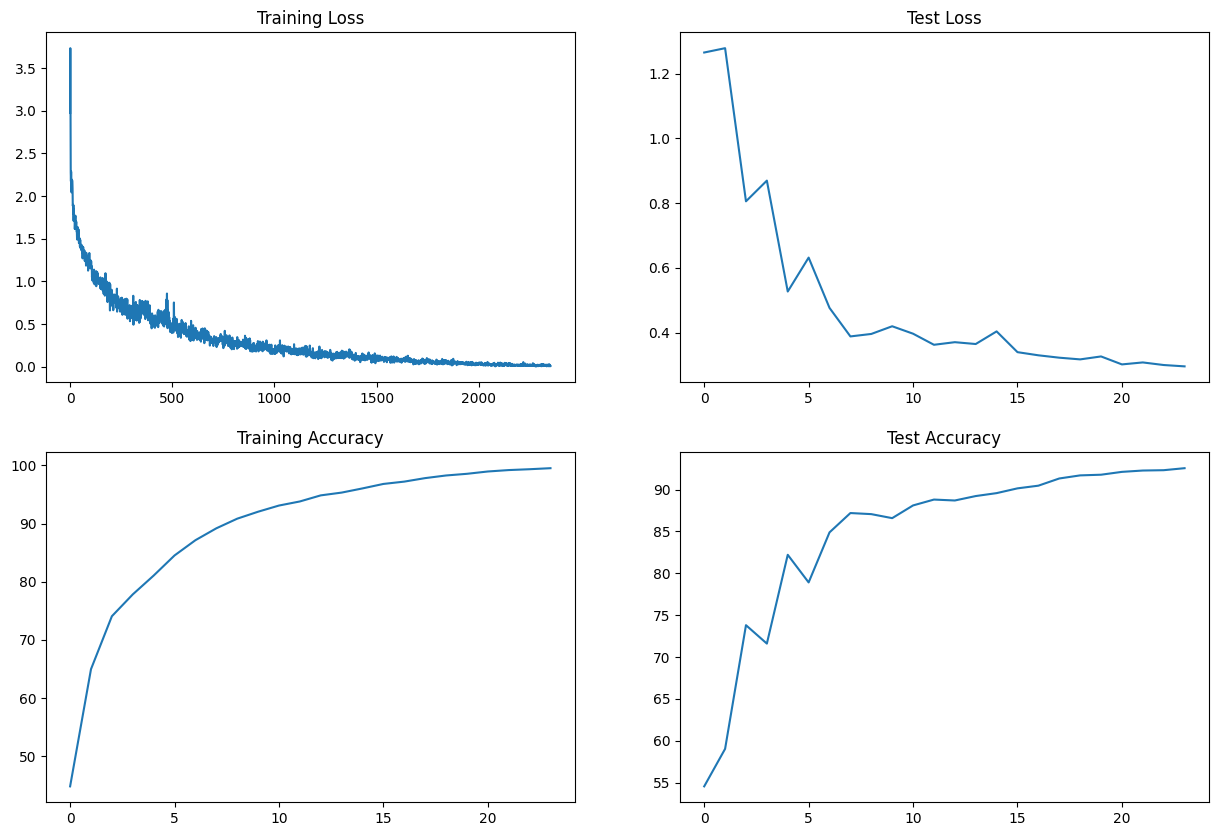

In [34]:
trteutil.plot_graphs()